### Importing Libraries

In [1]:
# !pip install pycaret

In [2]:
!pip install missingno

In [3]:
import pandas as pd
import missingno as mno
import datetime as datetime
from datetime import timedelta
from datetime import datetime

### Loading Datasets

In [4]:
train = pd.read_csv('/kaggle/input/datathon23-machine-learning-competition/train.csv')
test = pd.read_csv('/kaggle/input/datathon23-machine-learning-competition/test.csv')

In [5]:
train.shape

(25000, 11)

In [6]:
test.shape

(10040, 10)

In [7]:
train.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,NaN,0.740130,2.298231,-9.557202,-2.073442,NaN,88.656262,898.766427,Weekday,Monday,Light_Load
1,NaN,NaN,NaN,6.012130,NaN,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load
2,NaN,NaN,2.628231,10.497461,NaN,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.820810,2.908231,NaN,-17.683175,NaN,86.425249,NaN,NaN,Monday,Light_Load
4,01/01/2018 01:15,4.080329,3.848231,-2.531261,10.329537,NaN,97.969746,4499.247171,NaN,Monday,Light_Load


In [8]:
train.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [9]:
train.Load_Type.value_counts()

Light_Load      12676
Medium_Load      7044
Maximum_Load     5280
Name: Load_Type, dtype: int64

### Missing Values Analysis

In [10]:
train.isna().sum()

date                                    4942
Usage_kWh                               5047
Lagging_Current_Reactive.Power_kVarh    5051
Leading_Current_Reactive_Power_kVarh    4998
CO2(tCO2)                               5017
Lagging_Current_Power_Factor            5042
Leading_Current_Power_Factor            5079
NSM                                     4952
WeekStatus                              5112
Day_of_week                             5006
Load_Type                                  0
dtype: int64

In [11]:
df = train.append(test).reset_index(drop = True)

In [12]:
df.shape

(35040, 11)

In [13]:
df.isna().sum()

date                                     6933
Usage_kWh                                7038
Lagging_Current_Reactive.Power_kVarh     7035
Leading_Current_Reactive_Power_kVarh     6945
CO2(tCO2)                                6988
Lagging_Current_Power_Factor             6985
Leading_Current_Power_Factor             7149
NSM                                      6989
WeekStatus                               7144
Day_of_week                              6965
Load_Type                               10040
dtype: int64

<AxesSubplot:>

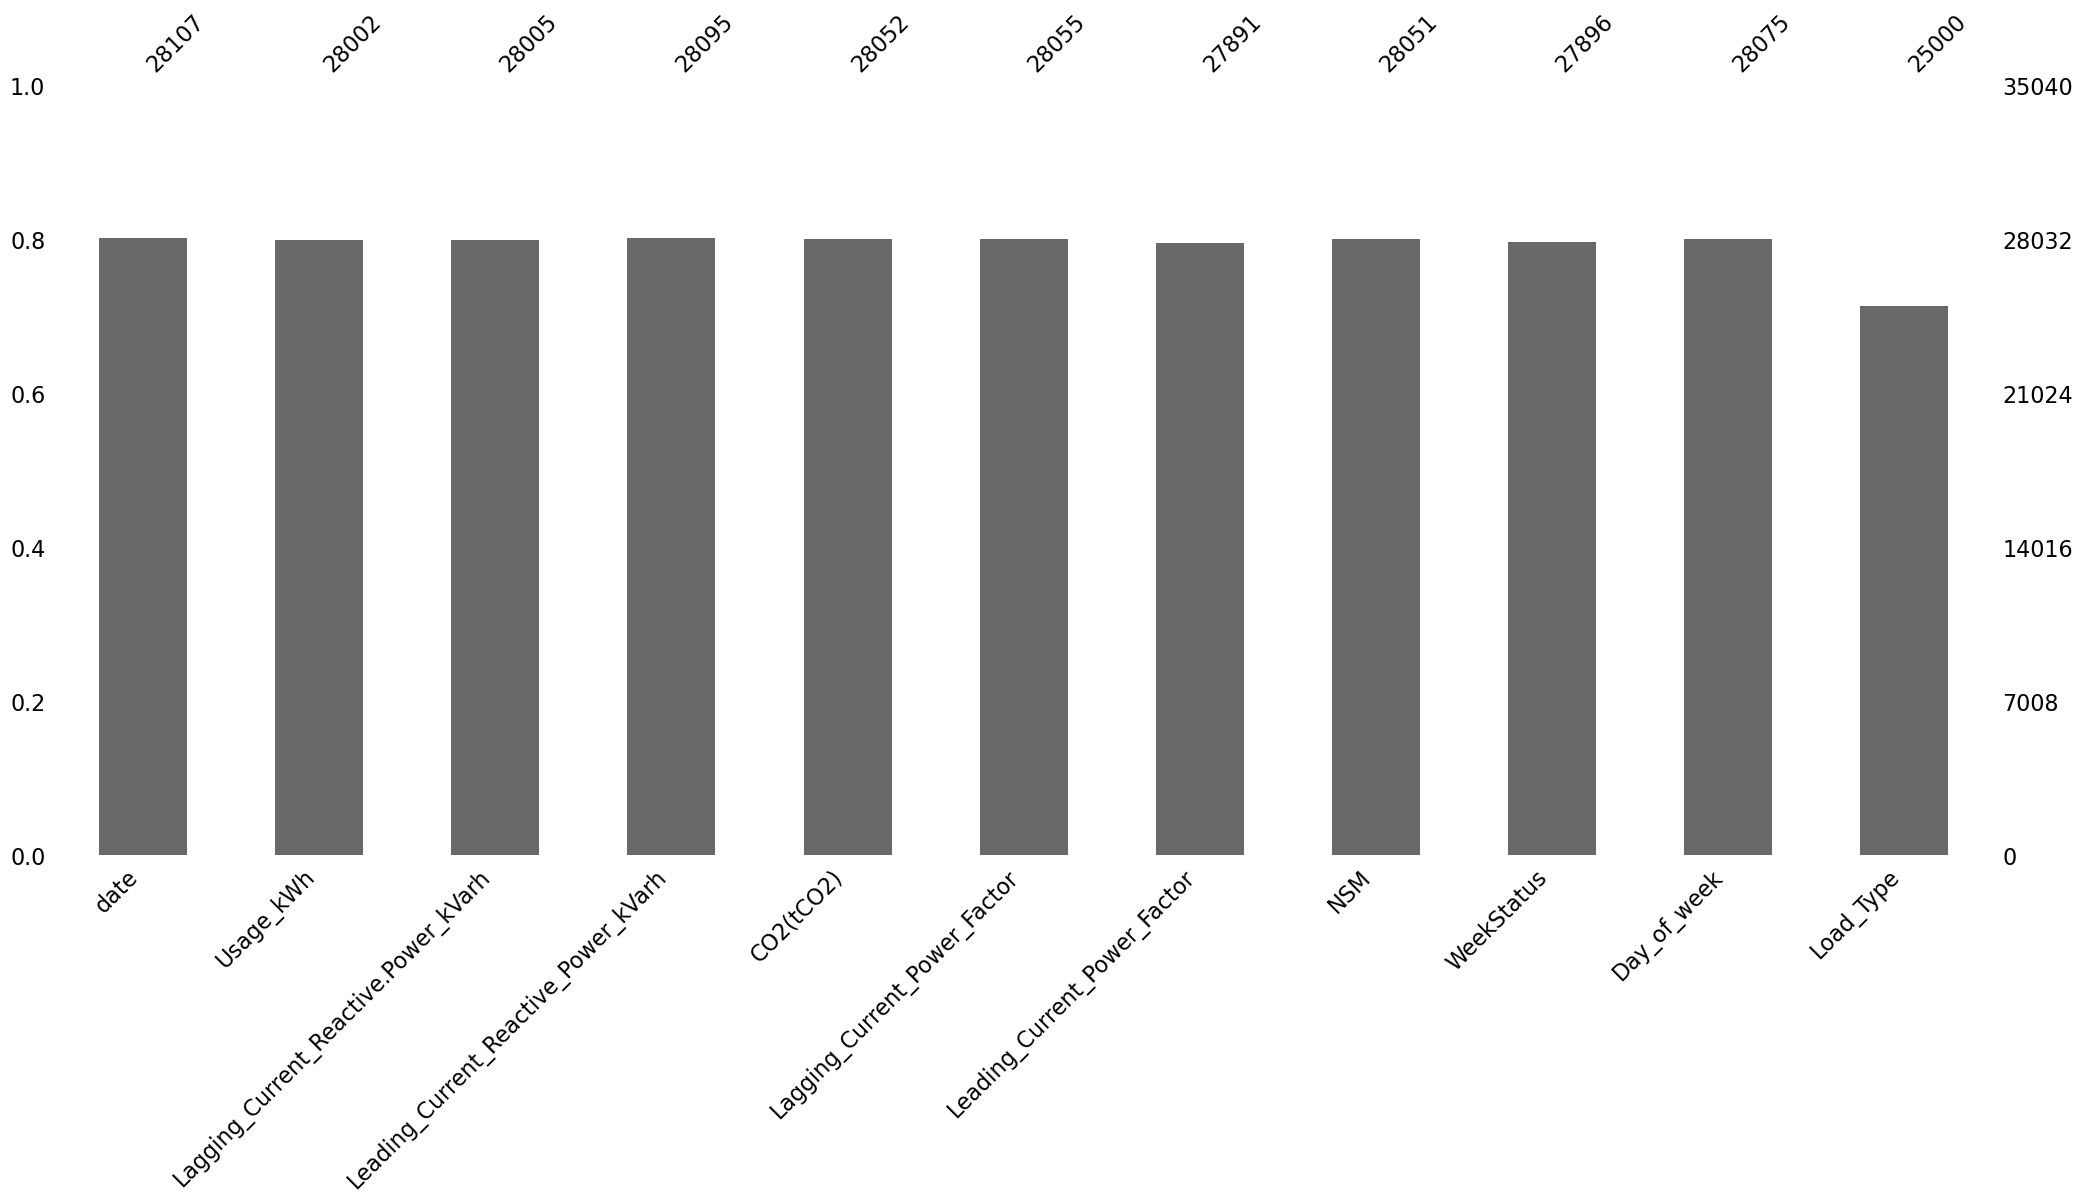

In [14]:
mno.bar(df)

<AxesSubplot:>

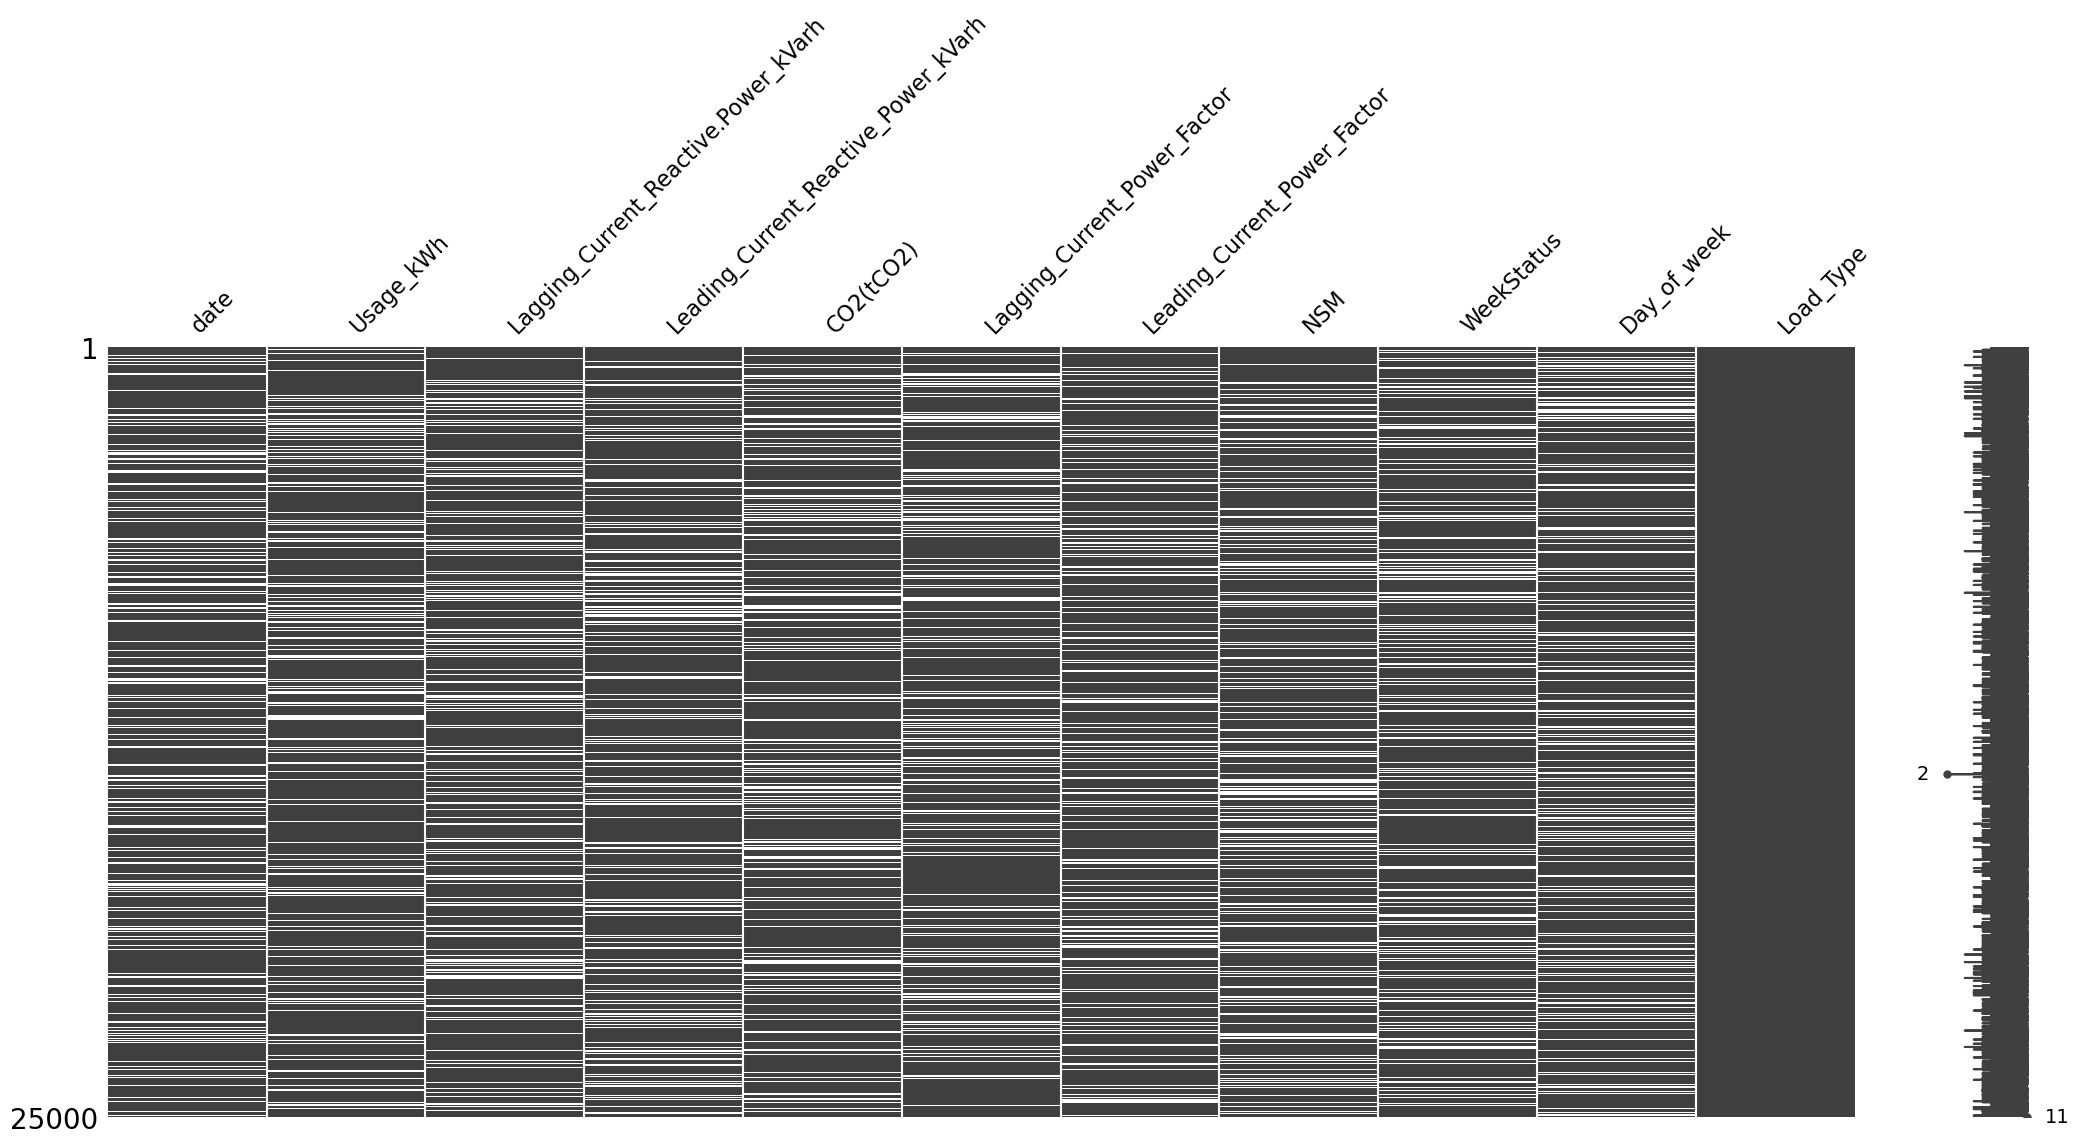

In [15]:
mno.matrix(train)

<AxesSubplot:>

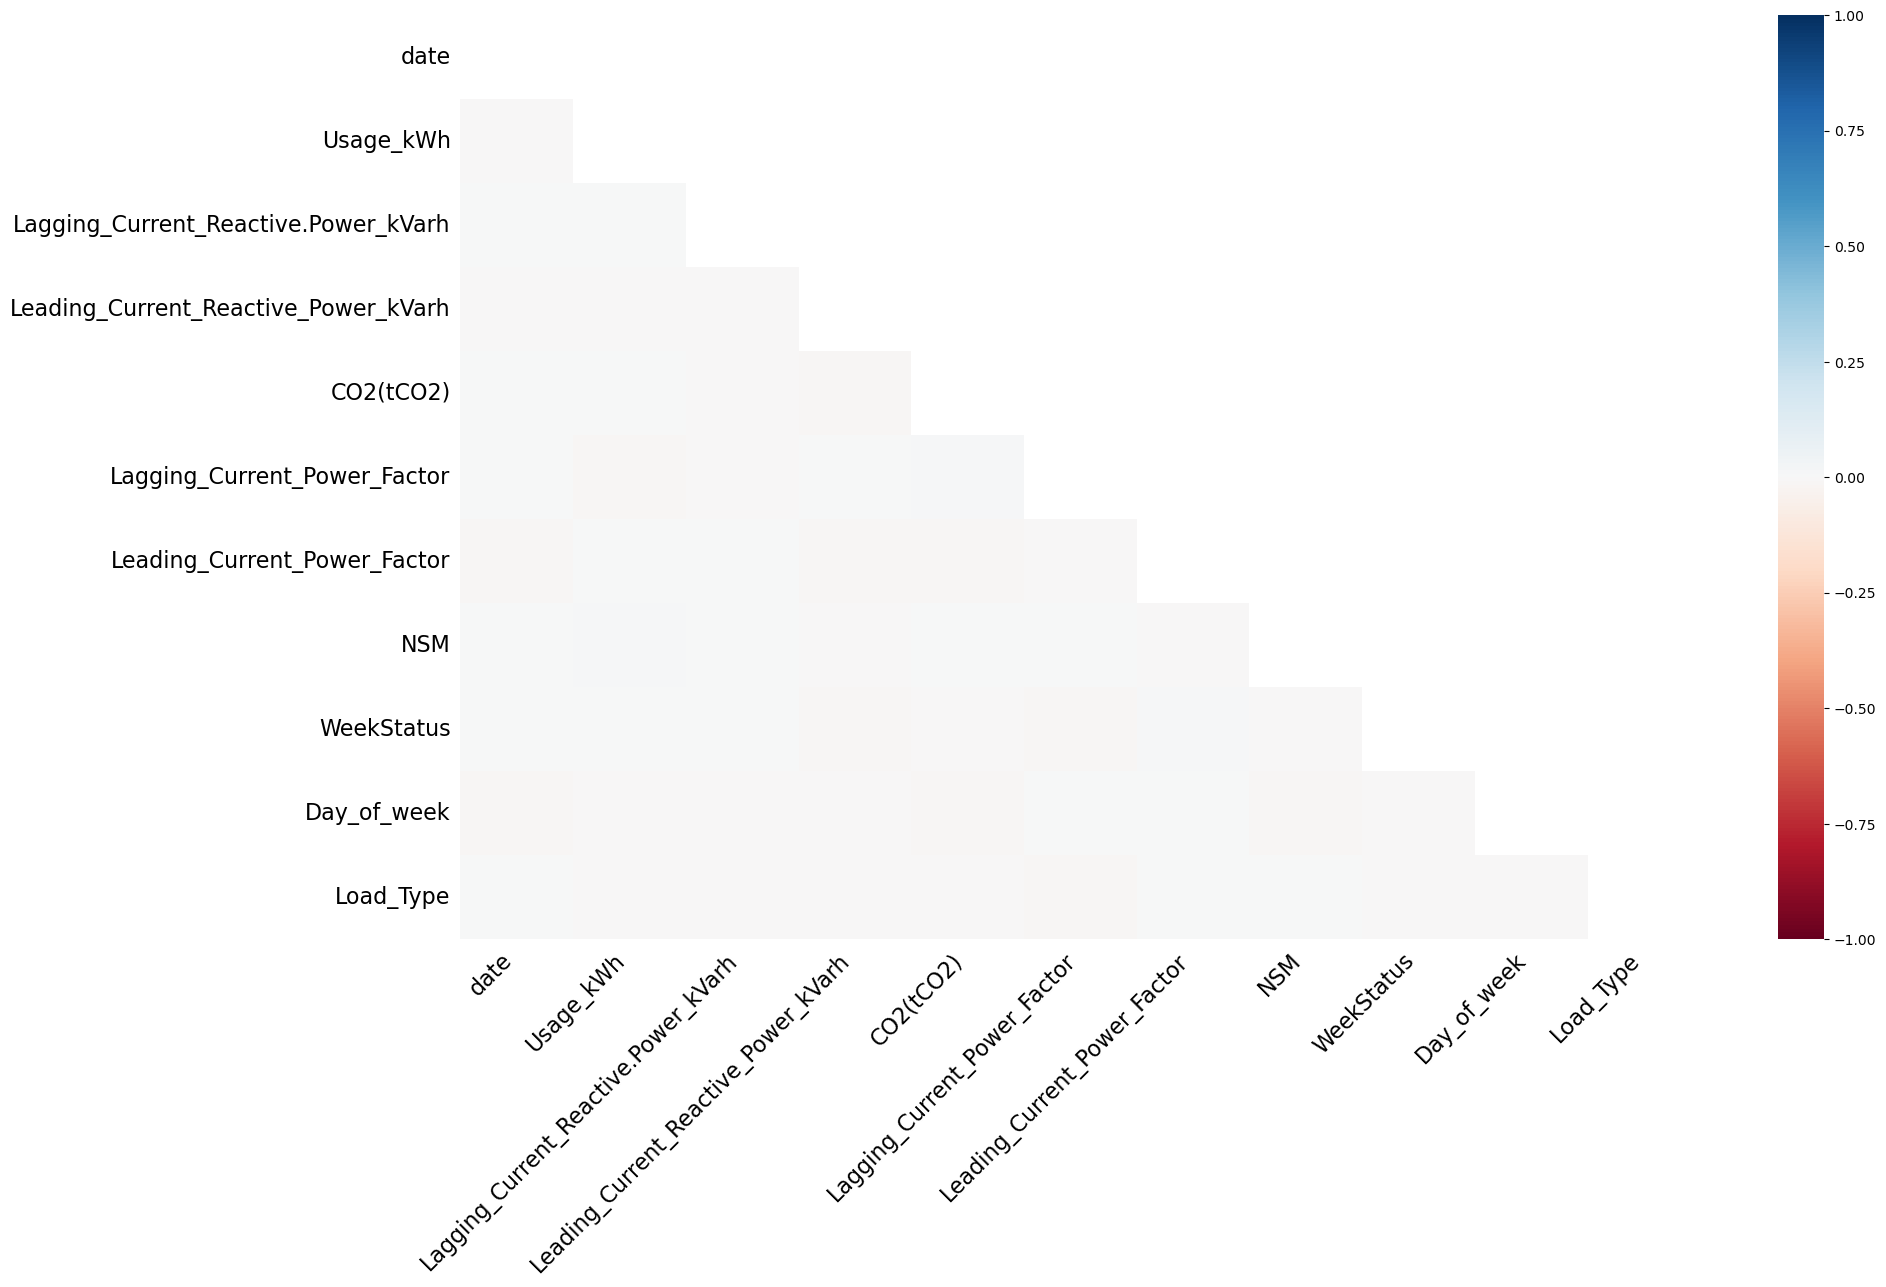

In [16]:
mno.heatmap(df)

In [17]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,NaN,0.740130,2.298231,-9.557202,-2.073442,NaN,88.656262,898.766427,Weekday,Monday,Light_Load
1,NaN,NaN,NaN,6.012130,NaN,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load
2,NaN,NaN,2.628231,10.497461,NaN,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.820810,2.908231,NaN,-17.683175,NaN,86.425249,NaN,NaN,Monday,Light_Load
4,01/01/2018 01:15,4.080329,3.848231,-2.531261,10.329537,NaN,97.969746,4499.247171,NaN,Monday,Light_Load


In [18]:
df.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/2018 23:00,1.345979,4.208231,8.595303,NaN,NaN,100.541055,82818.364080,Weekday,Monday,NaN
35036,31/12/2018 23:15,3.098010,3.088231,-8.150412,NaN,66.681097,NaN,83702.743477,Weekday,Monday,NaN
35037,NaN,1.429011,2.518231,-13.869061,0.500574,72.591097,104.937647,84592.522573,Weekday,Monday,NaN
35038,31/12/2018 23:45,NaN,2.408231,20.141646,-4.208992,73.691097,97.877770,85490.245365,Weekday,Monday,NaN
35039,31/12/2018 00:00,1.637324,2.368231,-17.727395,17.802956,73.191097,NaN,7.946324,NaN,NaN,NaN


### Converting date column to DateTime datatype

In [19]:
df['date'] = pd.to_datetime(df['date'])
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

### Date Imputation

We found a pattern in the dataset that consecutive rows had a difference of 15 minutes, but the dates were not sorted. But the data was sorted according to day's time. So, we found the min and max index of a particular date and imputated dates in a squential manner by an increament of 15 minutes.

In [20]:
len(df['date'].dt.date.unique())

366

In [21]:
df['date'].min()

Timestamp('2018-01-01 00:00:00')

In [22]:
df['date'].max()

Timestamp('2018-12-31 23:45:00')

In [23]:
24*4

96

In [24]:
365*96

35040

In [25]:
df.shape

(35040, 11)

In [26]:
test.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,2018-09-18 10:15:00,NaN,34.228231,0.941196,-9.793712,82.151097,93.025144,36908.316956,Weekday,Tuesday
1,NaT,51.435646,27.248231,NaN,12.326585,84.791097,87.734521,NaN,Weekday,NaN
2,NaT,46.479777,22.638231,18.830567,16.670175,86.541097,91.176788,38706.983910,NaN,Tuesday
3,2018-09-18 11:00:00,46.806177,25.338231,NaN,16.109592,83.521097,100.130085,39583.777302,Weekday,Tuesday
4,2018-09-18 11:15:00,59.168002,31.858231,NaN,-15.251937,84.071097,104.670912,40492.572125,Weekday,Tuesday


In [27]:
test['date'].min()

Timestamp('2018-01-10 00:00:00')

In [28]:
test['date'].max()

Timestamp('2018-12-31 23:45:00')

In [29]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,NaT,0.740130,2.298231,-9.557202,-2.073442,NaN,88.656262,898.766427,Weekday,Monday,Light_Load
1,NaT,NaN,NaN,6.012130,NaN,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load
2,NaT,NaN,2.628231,10.497461,NaN,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.820810,2.908231,NaN,-17.683175,NaN,86.425249,NaN,NaN,Monday,Light_Load
4,2018-01-01 01:15:00,4.080329,3.848231,-2.531261,10.329537,NaN,97.969746,4499.247171,NaN,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,1.345979,4.208231,8.595303,NaN,NaN,100.541055,82818.364080,Weekday,Monday,NaN
35036,2018-12-31 23:15:00,3.098010,3.088231,-8.150412,NaN,66.681097,NaN,83702.743477,Weekday,Monday,NaN
35037,NaT,1.429011,2.518231,-13.869061,0.500574,72.591097,104.937647,84592.522573,Weekday,Monday,NaN
35038,2018-12-31 23:45:00,NaN,2.408231,20.141646,-4.208992,73.691097,97.877770,85490.245365,Weekday,Monday,NaN


In [30]:
indexes = []
for i,row in df.iterrows():
    if pd.isna(row['date']):
        indexes.append(i)

In [31]:
#indexes

In [32]:
dates = list(df['date'].dt.date.unique())

In [33]:
dates = dates[1:]

In [34]:
#dates

In [35]:
len(dates)

365

In [36]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,NaT,0.740130,2.298231,-9.557202,-2.073442,NaN,88.656262,898.766427,Weekday,Monday,Light_Load
1,NaT,NaN,NaN,6.012130,NaN,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load
2,NaT,NaN,2.628231,10.497461,NaN,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.820810,2.908231,NaN,-17.683175,NaN,86.425249,NaN,NaN,Monday,Light_Load
4,2018-01-01 01:15:00,4.080329,3.848231,-2.531261,10.329537,NaN,97.969746,4499.247171,NaN,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,1.345979,4.208231,8.595303,NaN,NaN,100.541055,82818.364080,Weekday,Monday,NaN
35036,2018-12-31 23:15:00,3.098010,3.088231,-8.150412,NaN,66.681097,NaN,83702.743477,Weekday,Monday,NaN
35037,NaT,1.429011,2.518231,-13.869061,0.500574,72.591097,104.937647,84592.522573,Weekday,Monday,NaN
35038,2018-12-31 23:45:00,NaN,2.408231,20.141646,-4.208992,73.691097,97.877770,85490.245365,Weekday,Monday,NaN


In [37]:
for d in dates:
    temp_df = df[df['date'].dt.date == d]
    print(min(temp_df.index),max(temp_df.index))

3 95
96 191
192 287
290 383
384 479
480 575
576 671
672 767
770 862
864 959
960 1055
1056 1150
1152 1247
1250 1342
1344 1439
1440 1535
1537 1631
1632 1727
1728 1823
1824 1919
1920 2014
2016 2111
2112 2207
2208 2303
2304 2399
2400 2495
2496 2591
2593 2687
2688 2781
2786 2879
2881 2975
2976 3071
3072 3167
3168 3263
3265 3358
3361 3455
3456 3551
3553 3646
3648 3742
3744 3836
3840 3935
3936 4031
4032 4127
4128 4222
4224 4319
4320 4415
4416 4509
4513 4607
4608 4702
4706 4799
4800 4893
4896 4990
4992 5087
5088 5183
5185 5279
5280 5375
5376 5471
5472 5567
5571 5663
5664 5759
5762 5854
5856 5951
5952 6046
6048 6143
6144 6239
6240 6333
6336 6431
6433 6527
6528 6622
6624 6719
6720 6815
6816 6911
6912 7006
7008 7103
7104 7198
7202 7294
7296 7390
7392 7487
7489 7583
7584 7679
7680 7775
7776 7871
7872 7967
7968 8063
8064 8159
8162 8254
8257 8351
8352 8447
8448 8543
8544 8638
8641 8735
8736 8831
8832 8926
8929 9023
9025 9119
9120 9215
9216 9311
9312 9407
9408 9502
9504 9599
9600 9695
9698 9790
9792 

In [38]:
df['date_updated'] = 0
c = 0
for i in range(0,len(df),96):
    d = dates[c]
    c += 1
    value = datetime(d.year, d.month, d.day, 0, 15, 0)
    #print(value)
    for j in range(i,i+96): 
        if (j+1)%96 == 0:
            df.at[j,'date_updated'] = datetime(d.year, d.month, d.day, 0, 0, 0)
        else:
            df.at[j,'date_updated'] = value 
        value  += timedelta(minutes = 15)

In [39]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated
0,NaT,0.740130,2.298231,-9.557202,-2.073442,NaN,88.656262,898.766427,Weekday,Monday,Light_Load,2018-01-01 00:15:00
1,NaT,NaN,NaN,6.012130,NaN,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load,2018-01-01 00:30:00
2,NaT,NaN,2.628231,10.497461,NaN,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load,2018-01-01 00:45:00
3,2018-01-01 01:00:00,3.820810,2.908231,NaN,-17.683175,NaN,86.425249,NaN,NaN,Monday,Light_Load,2018-01-01 01:00:00
4,2018-01-01 01:15:00,4.080329,3.848231,-2.531261,10.329537,NaN,97.969746,4499.247171,NaN,Monday,Light_Load,2018-01-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,1.345979,4.208231,8.595303,NaN,NaN,100.541055,82818.364080,Weekday,Monday,NaN,2018-12-31 23:00:00
35036,2018-12-31 23:15:00,3.098010,3.088231,-8.150412,NaN,66.681097,NaN,83702.743477,Weekday,Monday,NaN,2018-12-31 23:15:00
35037,NaT,1.429011,2.518231,-13.869061,0.500574,72.591097,104.937647,84592.522573,Weekday,Monday,NaN,2018-12-31 23:30:00
35038,2018-12-31 23:45:00,NaN,2.408231,20.141646,-4.208992,73.691097,97.877770,85490.245365,Weekday,Monday,NaN,2018-12-31 23:45:00


In [40]:
df.loc[18000:18010]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated
18000,2018-07-07 12:15:00,20.839321,5.428231,9.915988,NaN,NaN,76.232505,44102.058070,Weekend,Saturday,Medium_Load,2018-07-07 12:15:00
18001,2018-07-07 12:30:00,NaN,-0.651769,13.978953,11.846240,95.971097,31.030677,45008.927965,Weekend,Saturday,Medium_Load,2018-07-07 12:30:00
18002,2018-07-07 12:45:00,4.289526,-0.651769,18.698813,-4.766212,95.971097,24.240550,45890.097619,Weekend,NaN,Medium_Load,2018-07-07 12:45:00
18003,2018-07-07 13:00:00,5.172786,-0.651769,16.429765,-12.676236,95.971097,NaN,46814.550470,Weekend,Saturday,Medium_Load,2018-07-07 13:00:00
18004,NaT,21.748535,4.138231,-12.055866,-16.799239,NaN,90.756316,47696.049729,Weekend,Saturday,Maximum_Load,2018-07-07 13:15:00
18005,2018-07-07 13:30:00,78.880638,20.368231,13.334763,-14.002686,92.671097,92.760299,48585.451458,Weekend,Saturday,Maximum_Load,2018-07-07 13:30:00
18006,2018-07-07 13:45:00,104.582595,34.988231,18.352974,11.656123,90.691097,NaN,49519.682090,Weekend,Saturday,Maximum_Load,2018-07-07 13:45:00
18007,NaT,NaN,NaN,15.957559,14.679932,91.281097,NaN,50404.621387,Weekend,NaN,Maximum_Load,2018-07-07 14:00:00
18008,2018-07-07 14:15:00,NaN,22.168231,NaN,8.744387,91.311097,95.053547,NaN,Weekend,NaN,Maximum_Load,2018-07-07 14:15:00
18009,2018-07-07 14:30:00,93.129717,25.268231,-5.377294,NaN,92.391097,91.564381,52195.867253,Weekend,Saturday,Maximum_Load,2018-07-07 14:30:00


In [41]:
df.isna().sum()

date                                     6933
Usage_kWh                                7038
Lagging_Current_Reactive.Power_kVarh     7035
Leading_Current_Reactive_Power_kVarh     6945
CO2(tCO2)                                6988
Lagging_Current_Power_Factor             6985
Leading_Current_Power_Factor             7149
NSM                                      6989
WeekStatus                               7144
Day_of_week                              6965
Load_Type                               10040
date_updated                                0
dtype: int64

In [42]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated
0,NaT,0.740130,2.298231,-9.557202,-2.073442,NaN,88.656262,898.766427,Weekday,Monday,Light_Load,2018-01-01 00:15:00
1,NaT,NaN,NaN,6.012130,NaN,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load,2018-01-01 00:30:00
2,NaT,NaN,2.628231,10.497461,NaN,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load,2018-01-01 00:45:00
3,2018-01-01 01:00:00,3.820810,2.908231,NaN,-17.683175,NaN,86.425249,NaN,NaN,Monday,Light_Load,2018-01-01 01:00:00
4,2018-01-01 01:15:00,4.080329,3.848231,-2.531261,10.329537,NaN,97.969746,4499.247171,NaN,Monday,Light_Load,2018-01-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,1.345979,4.208231,8.595303,NaN,NaN,100.541055,82818.364080,Weekday,Monday,NaN,2018-12-31 23:00:00
35036,2018-12-31 23:15:00,3.098010,3.088231,-8.150412,NaN,66.681097,NaN,83702.743477,Weekday,Monday,NaN,2018-12-31 23:15:00
35037,NaT,1.429011,2.518231,-13.869061,0.500574,72.591097,104.937647,84592.522573,Weekday,Monday,NaN,2018-12-31 23:30:00
35038,2018-12-31 23:45:00,NaN,2.408231,20.141646,-4.208992,73.691097,97.877770,85490.245365,Weekday,Monday,NaN,2018-12-31 23:45:00


### Numeric Columns Imputation

In [43]:
df.loc[85:105]['Usage_kWh']

85     1.474700
86     4.474075
87     1.875469
88     1.450141
89     0.565803
90     1.226643
91     3.509238
92          NaN
93     1.746177
94     2.739564
95     0.293686
96     1.901794
97          NaN
98     2.954307
99          NaN
100    1.168502
101    1.045839
102         NaN
103         NaN
104    3.859171
105    1.166499
Name: Usage_kWh, dtype: float64

In [44]:
df.dtypes

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                            float64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
date_updated                                    object
dtype: object

In [45]:
df['date_updated'] = pd.to_datetime(df['date_updated'])

In [46]:
df['date'] = df['date_updated'].dt.date
df['month'] = df['date_updated'].dt.month
df['hour'] = df['date_updated'].dt.hour
df['mins'] = df['date_updated'].dt.minute
df['day'] = df['date_updated'].dt.day

In [47]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated,month,hour,mins,day
0,2018-01-01,0.740130,2.298231,-9.557202,-2.073442,NaN,88.656262,898.766427,Weekday,Monday,Light_Load,2018-01-01 00:15:00,1,0,15,1
1,2018-01-01,NaN,NaN,6.012130,NaN,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load,2018-01-01 00:30:00,1,0,30,1
2,2018-01-01,NaN,2.628231,10.497461,NaN,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load,2018-01-01 00:45:00,1,0,45,1
3,2018-01-01,3.820810,2.908231,NaN,-17.683175,NaN,86.425249,NaN,NaN,Monday,Light_Load,2018-01-01 01:00:00,1,1,0,1
4,2018-01-01,4.080329,3.848231,-2.531261,10.329537,NaN,97.969746,4499.247171,NaN,Monday,Light_Load,2018-01-01 01:15:00,1,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31,1.345979,4.208231,8.595303,NaN,NaN,100.541055,82818.364080,Weekday,Monday,NaN,2018-12-31 23:00:00,12,23,0,31
35036,2018-12-31,3.098010,3.088231,-8.150412,NaN,66.681097,NaN,83702.743477,Weekday,Monday,NaN,2018-12-31 23:15:00,12,23,15,31
35037,2018-12-31,1.429011,2.518231,-13.869061,0.500574,72.591097,104.937647,84592.522573,Weekday,Monday,NaN,2018-12-31 23:30:00,12,23,30,31
35038,2018-12-31,NaN,2.408231,20.141646,-4.208992,73.691097,97.877770,85490.245365,Weekday,Monday,NaN,2018-12-31 23:45:00,12,23,45,31


In [48]:
def hour_min(row):
    return str(row['hour']) + "-" + str(row['mins'])

In [49]:
df['hour_min'] = df.apply(lambda x: hour_min(x), axis = 1)

In [50]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated,month,hour,mins,day,hour_min
0,2018-01-01,0.740130,2.298231,-9.557202,-2.073442,NaN,88.656262,898.766427,Weekday,Monday,Light_Load,2018-01-01 00:15:00,1,0,15,1,0-15
1,2018-01-01,NaN,NaN,6.012130,NaN,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load,2018-01-01 00:30:00,1,0,30,1,0-30
2,2018-01-01,NaN,2.628231,10.497461,NaN,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load,2018-01-01 00:45:00,1,0,45,1,0-45
3,2018-01-01,3.820810,2.908231,NaN,-17.683175,NaN,86.425249,NaN,NaN,Monday,Light_Load,2018-01-01 01:00:00,1,1,0,1,1-0
4,2018-01-01,4.080329,3.848231,-2.531261,10.329537,NaN,97.969746,4499.247171,NaN,Monday,Light_Load,2018-01-01 01:15:00,1,1,15,1,1-15


In [51]:
df.groupby('hour').mean()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,month,mins,day
hour,,,,,,,,,,
0,6.154721,6.403343,1.385218,1.048779,59.412202,94.580797,1358.460113,6.526027,22.5,15.720548
1,4.902854,5.481241,0.485474,1.045318,57.972892,94.610141,4945.493508,6.526027,22.5,15.720548
2,3.091669,4.508231,0.248599,0.745806,56.907795,94.742553,8580.820217,6.526027,22.5,15.720548
3,3.050973,4.461826,1.259413,1.685159,56.374889,94.950306,12141.567865,6.526027,22.5,15.720548
4,2.792753,4.625774,0.460064,1.289869,55.584077,96.049575,15741.357089,6.526027,22.5,15.720548
5,2.919457,4.517094,1.189228,1.219628,55.163102,95.775508,19356.841450,6.526027,22.5,15.720548
6,2.871975,4.513773,0.805327,1.023937,55.166160,95.752585,22958.657735,6.526027,22.5,15.720548
7,2.866344,4.455202,1.006364,0.611703,57.536662,95.788529,26554.882332,6.526027,22.5,15.720548
8,35.489655,29.472540,0.982526,0.466605,69.134342,95.256086,30162.439201,6.526027,22.5,15.720548


In [52]:
hour_min_df = df.groupby('hour_min').mean()
hour_min_df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,month,hour,mins,day
hour_min,,,,,,,,,,,
0-0,6.622997,6.483955,0.545624,0.678438,60.059488,94.777642,0.064137,6.526027,0.0,0.0,15.720548
0-15,5.269130,6.137267,2.036041,0.976424,59.845493,94.075448,900.905649,6.526027,0.0,15.0,15.720548
0-30,6.741973,6.432507,1.573916,2.022723,59.169640,94.839528,1799.784740,6.526027,0.0,30.0,15.720548
0-45,5.974848,6.546061,1.379188,0.565560,58.593024,94.615760,2701.204245,6.526027,0.0,45.0,15.720548
1-0,6.629364,6.489183,0.343055,0.940180,58.310608,94.372614,3599.649199,6.526027,1.0,0.0,15.720548
...,...,...,...,...,...,...,...,...,...,...,...
8-45,55.174310,44.070376,1.460918,1.322847,72.975221,94.022285,31499.592840,6.526027,8.0,45.0,15.720548
9-0,55.905230,27.416032,1.666125,0.833645,88.520788,81.609936,32400.918094,6.526027,9.0,0.0,15.720548
9-15,56.157351,23.877689,0.970644,-0.346740,89.626202,81.333561,33299.793659,6.526027,9.0,15.0,15.720548


In [53]:
df.isna().sum()

date                                        0
Usage_kWh                                7038
Lagging_Current_Reactive.Power_kVarh     7035
Leading_Current_Reactive_Power_kVarh     6945
CO2(tCO2)                                6988
Lagging_Current_Power_Factor             6985
Leading_Current_Power_Factor             7149
NSM                                      6989
WeekStatus                               7144
Day_of_week                              6965
Load_Type                               10040
date_updated                                0
month                                       0
hour                                        0
mins                                        0
day                                         0
hour_min                                    0
dtype: int64

In [54]:
df.dtypes

date                                            object
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                            float64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
date_updated                            datetime64[ns]
month                                            int64
hour                                             int64
mins                                             int64
day                                              int64
hour_min                                        object
dtype: object

In [55]:
df.isna().sum()

date                                        0
Usage_kWh                                7038
Lagging_Current_Reactive.Power_kVarh     7035
Leading_Current_Reactive_Power_kVarh     6945
CO2(tCO2)                                6988
Lagging_Current_Power_Factor             6985
Leading_Current_Power_Factor             7149
NSM                                      6989
WeekStatus                               7144
Day_of_week                              6965
Load_Type                               10040
date_updated                                0
month                                       0
hour                                        0
mins                                        0
day                                         0
hour_min                                    0
dtype: int64

In [56]:
df.loc[100:110]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated,month,hour,mins,day,hour_min
100,2018-02-01,1.168502,4.068231,1.438046,13.945243,59.571097,NaN,4488.983072,Weekday,Tuesday,Light_Load,2018-02-01 01:15:00,2,1,15,1,1-15
101,2018-02-01,1.045839,2.878231,-18.029178,15.191619,64.041097,94.013027,5398.719850,Weekday,Tuesday,Light_Load,2018-02-01 01:30:00,2,1,30,1,1-30
102,2018-02-01,NaN,3.308231,NaN,-18.607962,61.771097,92.402746,6316.670819,NaN,Tuesday,Light_Load,2018-02-01 01:45:00,2,1,45,1,1-45
103,2018-02-01,NaN,4.168231,NaN,NaN,57.681097,97.509581,NaN,Weekday,NaN,Light_Load,2018-02-01 02:00:00,2,2,0,1,2-0
104,2018-02-01,3.859171,2.878231,12.139738,5.960419,64.371097,99.203376,8090.514117,Weekday,NaN,Light_Load,2018-02-01 02:15:00,2,2,15,1,2-15
105,2018-02-01,1.166499,3.708231,12.778089,NaN,59.641097,85.930741,9011.762679,Weekday,NaN,Light_Load,2018-02-01 02:30:00,2,2,30,1,2-30
106,2018-02-01,2.276463,3.738231,NaN,10.905889,59.801097,104.378595,NaN,Weekday,Tuesday,Light_Load,2018-02-01 02:45:00,2,2,45,1,2-45
107,2018-02-01,NaN,3.058231,4.471970,-15.739416,62.211097,NaN,10807.516111,NaN,Tuesday,Light_Load,2018-02-01 03:00:00,2,3,0,1,3-0
108,2018-02-01,2.117600,NaN,NaN,-7.310198,59.001097,86.866602,11710.260317,Weekday,Tuesday,Light_Load,2018-02-01 03:15:00,2,3,15,1,3-15
109,2018-02-01,0.268985,NaN,NaN,15.449720,62.181097,102.959920,12600.093551,NaN,Tuesday,Light_Load,2018-02-01 03:30:00,2,3,30,1,3-30


### Interpolating CO2

In [57]:
df['CO2(tCO2)'] = df['CO2(tCO2)'].interpolate()

In [58]:
df.loc[100:110]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated,month,hour,mins,day,hour_min
100,2018-02-01,1.168502,4.068231,1.438046,13.945243,59.571097,NaN,4488.983072,Weekday,Tuesday,Light_Load,2018-02-01 01:15:00,2,1,15,1,1-15
101,2018-02-01,1.045839,2.878231,-18.029178,15.191619,64.041097,94.013027,5398.719850,Weekday,Tuesday,Light_Load,2018-02-01 01:30:00,2,1,30,1,1-30
102,2018-02-01,NaN,3.308231,NaN,-18.607962,61.771097,92.402746,6316.670819,NaN,Tuesday,Light_Load,2018-02-01 01:45:00,2,1,45,1,1-45
103,2018-02-01,NaN,4.168231,NaN,-6.323772,57.681097,97.509581,NaN,Weekday,NaN,Light_Load,2018-02-01 02:00:00,2,2,0,1,2-0
104,2018-02-01,3.859171,2.878231,12.139738,5.960419,64.371097,99.203376,8090.514117,Weekday,NaN,Light_Load,2018-02-01 02:15:00,2,2,15,1,2-15
105,2018-02-01,1.166499,3.708231,12.778089,8.433154,59.641097,85.930741,9011.762679,Weekday,NaN,Light_Load,2018-02-01 02:30:00,2,2,30,1,2-30
106,2018-02-01,2.276463,3.738231,NaN,10.905889,59.801097,104.378595,NaN,Weekday,Tuesday,Light_Load,2018-02-01 02:45:00,2,2,45,1,2-45
107,2018-02-01,NaN,3.058231,4.471970,-15.739416,62.211097,NaN,10807.516111,NaN,Tuesday,Light_Load,2018-02-01 03:00:00,2,3,0,1,3-0
108,2018-02-01,2.117600,NaN,NaN,-7.310198,59.001097,86.866602,11710.260317,Weekday,Tuesday,Light_Load,2018-02-01 03:15:00,2,3,15,1,3-15
109,2018-02-01,0.268985,NaN,NaN,15.449720,62.181097,102.959920,12600.093551,NaN,Tuesday,Light_Load,2018-02-01 03:30:00,2,3,30,1,3-30


In [59]:
num_cols = []
for col in df.columns:
    if df[col].dtype == 'float64':
        num_cols.append(col)

In [60]:
num_cols

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

In [61]:
def missing_values(row, col_name):
    usage = row[col_name]
    if pd.isna(usage):
        return hour_min_df.loc[row['hour_min']][col_name]
    return row[col_name]

In [62]:
for col in num_cols:
    df[col] = df.apply(lambda x : missing_values(x, col), axis = 1)

In [63]:
df.isna().sum()

date                                        0
Usage_kWh                                   0
Lagging_Current_Reactive.Power_kVarh        0
Leading_Current_Reactive_Power_kVarh        0
CO2(tCO2)                                   0
Lagging_Current_Power_Factor                0
Leading_Current_Power_Factor                0
NSM                                         0
WeekStatus                               7144
Day_of_week                              6965
Load_Type                               10040
date_updated                                0
month                                       0
hour                                        0
mins                                        0
day                                         0
hour_min                                    0
dtype: int64

In [64]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated,month,hour,mins,day,hour_min
0,2018-01-01,0.740130,2.298231,-9.557202,-2.073442,59.845493,88.656262,898.766427,Weekday,Monday,Light_Load,2018-01-01 00:15:00,1,0,15,1,0-15
1,2018-01-01,6.741973,6.432507,6.012130,-7.276686,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load,2018-01-01 00:30:00,1,0,30,1,0-30
2,2018-01-01,5.974848,2.628231,10.497461,-12.479930,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load,2018-01-01 00:45:00,1,0,45,1,0-45
3,2018-01-01,3.820810,2.908231,0.343055,-17.683175,58.310608,86.425249,3599.649199,NaN,Monday,Light_Load,2018-01-01 01:00:00,1,1,0,1,1-0
4,2018-01-01,4.080329,3.848231,-2.531261,10.329537,58.745408,97.969746,4499.247171,NaN,Monday,Light_Load,2018-01-01 01:15:00,1,1,15,1,1-15


In [65]:
df.loc[90:100]

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated,month,hour,mins,day,hour_min
90,2018-01-01,1.226643,2.698231,1.057927,-1.038468,65.491097,89.757049,81886.922071,Weekday,NaN,Light_Load,2018-01-01 22:45:00,1,22,45,1,22-45
91,2018-01-01,3.509238,3.088231,1.165934,1.447053,64.611097,93.463597,82799.689998,Weekday,NaN,Light_Load,2018-01-01 23:00:00,1,23,0,1,23-0
92,2018-01-01,6.367917,2.768231,1.424643,3.932573,67.791097,102.197715,83699.811096,NaN,NaN,Light_Load,2018-01-01 23:15:00,1,23,15,1,23-15
93,2018-01-01,1.746177,2.298231,0.443764,3.494043,69.911097,86.384139,84600.309370,NaN,Monday,Light_Load,2018-01-01 23:30:00,1,23,30,1,23-30
94,2018-01-01,2.739564,3.308231,-6.185300,4.772207,63.941097,88.761256,85500.109282,Weekday,Monday,Light_Load,2018-01-01 23:45:00,1,23,45,1,23-45
95,2018-01-01,0.293686,2.808231,20.479531,6.050371,60.059488,101.716805,18.040605,NaN,Monday,Light_Load,2018-01-01 00:00:00,1,0,0,1,0-0
96,2018-02-01,1.901794,6.137267,15.273682,13.421202,59.845493,88.172274,894.676990,Weekday,Tuesday,Light_Load,2018-02-01 00:15:00,2,0,15,1,0-15
97,2018-02-01,6.741973,3.958231,-8.623386,-6.075966,60.071097,94.839528,1805.791761,Weekday,Tuesday,Light_Load,2018-02-01 00:30:00,2,0,30,1,0-30
98,2018-02-01,2.954307,3.018231,6.941445,-2.095267,62.611097,103.063104,2703.609016,Weekday,Tuesday,Light_Load,2018-02-01 00:45:00,2,0,45,1,0-45
99,2018-02-01,6.629364,2.948231,-5.583688,14.121680,64.091097,103.678003,3583.635165,NaN,Tuesday,Light_Load,2018-02-01 01:00:00,2,1,0,1,1-0


### Handling missing week status

In [66]:
df.WeekStatus.value_counts()

Weekday    19912
Weekend     7984
Name: WeekStatus, dtype: int64

In [67]:
df.Day_of_week.value_counts()

Monday       4097
Friday       4025
Sunday       4013
Tuesday      4006
Thursday     3997
Wednesday    3971
Saturday     3966
Name: Day_of_week, dtype: int64

In [68]:
df.loc[0]['date'].strftime('%A')

'Monday'

### Handling missing day of week

In [69]:
def missing_date(d):
    return d.strftime('%A')

In [70]:
df['Day_of_week'] = df['date'].apply(lambda x: missing_date(x))

In [71]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated,month,hour,mins,day,hour_min
0,2018-01-01,0.740130,2.298231,-9.557202,-2.073442,59.845493,88.656262,898.766427,Weekday,Monday,Light_Load,2018-01-01 00:15:00,1,0,15,1,0-15
1,2018-01-01,6.741973,6.432507,6.012130,-7.276686,62.741097,100.961237,1795.531830,Weekday,Monday,Light_Load,2018-01-01 00:30:00,1,0,30,1,0-30
2,2018-01-01,5.974848,2.628231,10.497461,-12.479930,66.251097,90.880756,2715.267065,Weekday,Monday,Light_Load,2018-01-01 00:45:00,1,0,45,1,0-45
3,2018-01-01,3.820810,2.908231,0.343055,-17.683175,58.310608,86.425249,3599.649199,NaN,Monday,Light_Load,2018-01-01 01:00:00,1,1,0,1,1-0
4,2018-01-01,4.080329,3.848231,-2.531261,10.329537,58.745408,97.969746,4499.247171,NaN,Monday,Light_Load,2018-01-01 01:15:00,1,1,15,1,1-15


In [72]:
df['NSM'] = round(df['NSM'],0)

In [73]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_updated,month,hour,mins,day,hour_min
0,2018-01-01,0.740130,2.298231,-9.557202,-2.073442,59.845493,88.656262,899.0,Weekday,Monday,Light_Load,2018-01-01 00:15:00,1,0,15,1,0-15
1,2018-01-01,6.741973,6.432507,6.012130,-7.276686,62.741097,100.961237,1796.0,Weekday,Monday,Light_Load,2018-01-01 00:30:00,1,0,30,1,0-30
2,2018-01-01,5.974848,2.628231,10.497461,-12.479930,66.251097,90.880756,2715.0,Weekday,Monday,Light_Load,2018-01-01 00:45:00,1,0,45,1,0-45
3,2018-01-01,3.820810,2.908231,0.343055,-17.683175,58.310608,86.425249,3600.0,NaN,Monday,Light_Load,2018-01-01 01:00:00,1,1,0,1,1-0
4,2018-01-01,4.080329,3.848231,-2.531261,10.329537,58.745408,97.969746,4499.0,NaN,Monday,Light_Load,2018-01-01 01:15:00,1,1,15,1,1-15


In [74]:
df.Day_of_week.value_counts()

Monday       5088
Thursday     4992
Sunday       4992
Tuesday      4992
Friday       4992
Wednesday    4992
Saturday     4992
Name: Day_of_week, dtype: int64

In [75]:
df.isna().sum()

date                                        0
Usage_kWh                                   0
Lagging_Current_Reactive.Power_kVarh        0
Leading_Current_Reactive_Power_kVarh        0
CO2(tCO2)                                   0
Lagging_Current_Power_Factor                0
Leading_Current_Power_Factor                0
NSM                                         0
WeekStatus                               7144
Day_of_week                                 0
Load_Type                               10040
date_updated                                0
month                                       0
hour                                        0
mins                                        0
day                                         0
hour_min                                    0
dtype: int64

In [76]:
def missing_week_status(s):
    if s == 'Saturday' or s == 'Sunday':
        return 'Weekend'
    return 'Weekday'

In [77]:
df['WeekStatus'] = df['Day_of_week'].apply(lambda x: missing_week_status(x))

In [78]:
df.WeekStatus.value_counts()

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

In [79]:
df.isna().sum()

date                                        0
Usage_kWh                                   0
Lagging_Current_Reactive.Power_kVarh        0
Leading_Current_Reactive_Power_kVarh        0
CO2(tCO2)                                   0
Lagging_Current_Power_Factor                0
Leading_Current_Power_Factor                0
NSM                                         0
WeekStatus                                  0
Day_of_week                                 0
Load_Type                               10040
date_updated                                0
month                                       0
hour                                        0
mins                                        0
day                                         0
hour_min                                    0
dtype: int64

In [80]:
df = df.drop(columns = ['date','date_updated','month','hour','mins','day'])

In [81]:
df = df.drop(columns = ['hour_min'])

In [82]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ['WeekStatus','Day_of_week']
for col in cols:
    df[col] = le.fit_transform(df[col])


In [83]:
train = df.loc[0:24999]

In [84]:
train.isna().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [85]:
test = df.loc[25000:]

In [86]:
test.shape

(10040, 10)

In [87]:
test.isna().sum()

Usage_kWh                                   0
Lagging_Current_Reactive.Power_kVarh        0
Leading_Current_Reactive_Power_kVarh        0
CO2(tCO2)                                   0
Lagging_Current_Power_Factor                0
Leading_Current_Power_Factor                0
NSM                                         0
WeekStatus                                  0
Day_of_week                                 0
Load_Type                               10040
dtype: int64

In [88]:
!pip install lazypredict

In [89]:
import seaborn as sns

<AxesSubplot:>

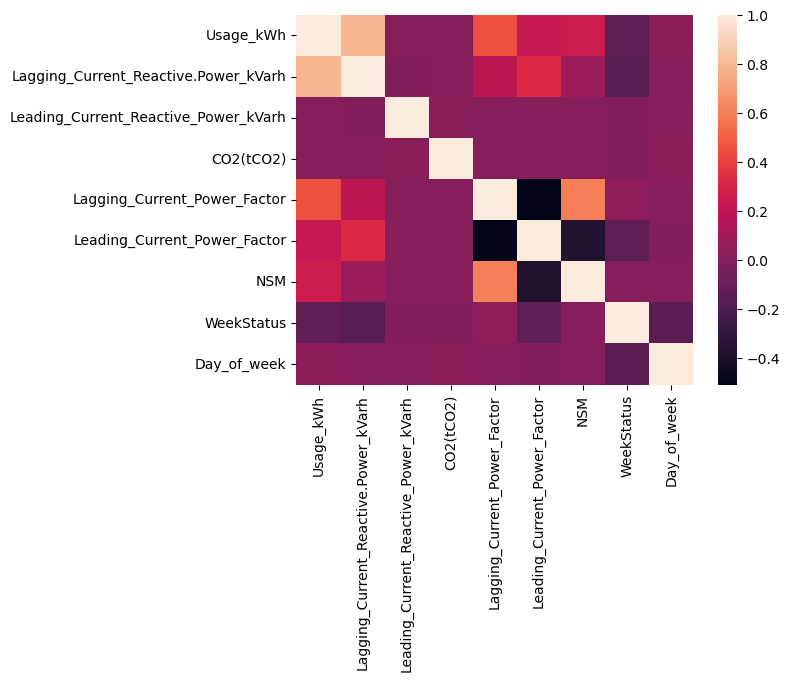

In [90]:
sns.heatmap(train.corr())

In [91]:
train.loc[train['Load_Type']=='Maximum_Load','Target']=2
train.loc[train['Load_Type']=='Medium_Load','Target']=1
train.loc[train['Load_Type']=='Light_Load','Target']=0

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [92]:
from sklearn.model_selection import train_test_split
X = train.drop(columns = ['Target','Load_Type'])
y = train.Target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =123)

In [93]:
X.dtypes

Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                     float64
WeekStatus                                int64
Day_of_week                               int64
dtype: object

In [94]:
# from pycaret.classification import *
# clf1 = setup(data = train, target = 'Load_Type', session_id = 4020, n_jobs = 1)
# # compare models
# best = compare_models()

In [95]:
## Import required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create an AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=1)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.86384


In [96]:
X.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,0.740130,2.298231,-9.557202,-2.073442,59.845493,88.656262,899.0,0,1
1,6.741973,6.432507,6.012130,-7.276686,62.741097,100.961237,1796.0,0,1
2,5.974848,2.628231,10.497461,-12.479930,66.251097,90.880756,2715.0,0,1
3,3.820810,2.908231,0.343055,-17.683175,58.310608,86.425249,3600.0,0,1
4,4.080329,3.848231,-2.531261,10.329537,58.745408,97.969746,4499.0,0,1


In [97]:
test = test.drop(columns = 'Load_Type')

In [98]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import load_boston

# # Define the hyperparameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200, 500, 1000],
#     'max_depth': [2, 4, 6, 8],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create a Random Forest regressor object
# rf = RandomForestRegressor()

# # Create the GridSearchCV object with the specified hyperparameters
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X, y)

# # Print the best hyperparameters and the corresponding mean cross-validated score
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

In [99]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=1500, max_depth=20, max_features='sqrt', random_state=1)

# Train the classifier on the training set
clf.fit(X, y)

# Predict the classes of the test set
y_pred = clf.predict(test)

# Evaluate the accuracy of the classifier
# accuracy = clf.score(X_test, y_test)
# print("Accuracy:", accuracy)


In [100]:
y_pred[10:20]

array([1., 1., 2., 2., 2., 2., 2., 2., 2., 2.])

In [101]:
len(y_pred)

10040

In [102]:
subs = pd.read_csv('/kaggle/input/datathon23-machine-learning-competition/sample_submission.csv')
subs['Load_Type'] = y_pred

In [103]:
subs.head()

,ID,Load_Type
0,0,2.0
1,1,2.0
2,2,2.0
3,3,2.0
4,4,2.0


In [104]:
def fn(x):
    if x == 0:
        return "Light_Load"
    elif x == 1:
        return "Medium_Load"
    return "Maximum_Load"

In [105]:
subs['Load_Type'] = subs['Load_Type'].apply(lambda x: fn(x))

In [106]:
subs.head()

,ID,Load_Type
0,0,Maximum_Load
1,1,Maximum_Load
2,2,Maximum_Load
3,3,Maximum_Load
4,4,Maximum_Load


In [107]:
subs.to_csv('submission.csv', index = False)